# PyTorch Neural Network Digits Classifier
**Dataset:** MNIST

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import matplotlib.pyplot as plt
from torchvision import datasets, transforms

from torch import nn
from torch import optim
import torch.nn.functional as F

**Download _MNIST_ dataset**  
I will be using batches of 64

In [2]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                             ])
# Download and load the training data
trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.MNIST('MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

In [3]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

In [4]:
def print_sample_digit(index):
    print(str.format('Label: {}',labels[index]))
    plt.figure(num=None, figsize=(1, 1), dpi=56, facecolor='w', edgecolor='k')
    plt.imshow(images[index].numpy().squeeze(), cmap='Greys_r');

Label: 1


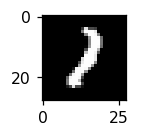

In [5]:
print_sample_digit(0)

Label: 8


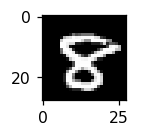

In [6]:
print_sample_digit(1)

In [7]:
# Input are images of 28 x 28 pixels each
input_size = 784 
# Hidden layers size
h1_size, h2_size, h3_size = 400,200,100 
# Output will be 10 since we will get the softmax probability for each digit (0-9)
output_size = 10 

### Define the model

In [8]:
model = nn.Sequential(
            nn.Linear(input_size, h1_size),
            nn.ReLU(),
            nn.Linear(h1_size, h2_size),
            nn.ReLU(),
            nn.Linear(h2_size, h3_size),
            nn.ReLU(),
            nn.Linear(h3_size, output_size)
            )        

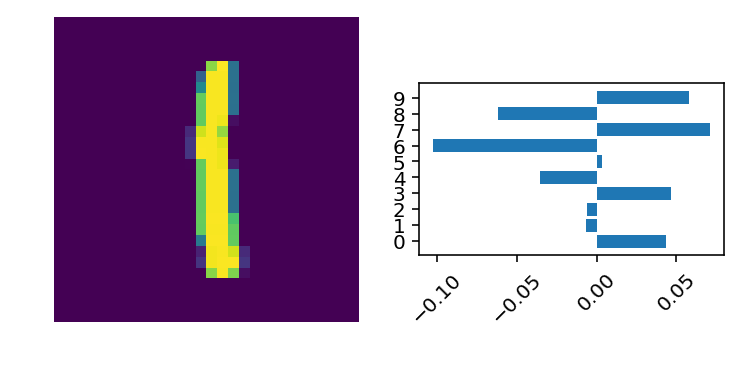

In [9]:
# Get images and labels
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)

# Feedforward the network
ps = model.forward(images[0,:])

# Print result for the first image
fig, (ax1, ax2) = plt.subplots(figsize=(6,6), ncols=2)
ps = ps.data.numpy().squeeze()

ax1.imshow(images[0].resize_(1, 28, 28).numpy().squeeze())
ax1.axis('off')

ax2.barh(np.arange(10), ps )
ax2.set_aspect(0.01)
ax2.set_yticks(np.arange(10))
plt.xticks(rotation='45')

plt.show();

# Right now since the Neural Network did not update weights yet all probabilities are roughtly the same

In [19]:
# Define the Loss Function
criterion = nn.CrossEntropyLoss() 

# Define optimizer as Stochastic Gradient Descent with a learning rate of 0.01
sgd_optimizer = optim.SGD(model.parameters(), lr = 0.003)

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights

### Time to train the Neural Network!

In [20]:
epochs = 5
print_every = 40
steps = 0

for epoch in range(epochs):
    running_loss = 0
    
    # Get images and labels
    for images, labels in iter(trainloader):
        steps += 1
        images.resize_(images.size()[0], input_size)
        
        # Set gradients to zero
        sgd_optimizer.zero_grad()
        
        y_hat = model.forward(images)
        loss = criterion(y_hat,labels)
        loss.backward()
        sgd_optimizer.step()
        
        running_loss += loss.item()
        
        if steps % print_every == 0:
            print("Epoch: {}/{}... ".format(epoch+1, epochs),
                  "Loss: {:.4f}".format(running_loss/print_every))
            
            running_loss = 0


Epoch: 1/5...  Loss: 0.6098
Epoch: 1/5...  Loss: 0.6357
Epoch: 1/5...  Loss: 0.5972
Epoch: 1/5...  Loss: 0.5721
Epoch: 1/5...  Loss: 0.5594
Epoch: 1/5...  Loss: 0.5413
Epoch: 1/5...  Loss: 0.5503
Epoch: 1/5...  Loss: 0.5204
Epoch: 1/5...  Loss: 0.5359
Epoch: 1/5...  Loss: 0.5311
Epoch: 1/5...  Loss: 0.5365
Epoch: 1/5...  Loss: 0.5226
Epoch: 1/5...  Loss: 0.5214
Epoch: 1/5...  Loss: 0.5030
Epoch: 1/5...  Loss: 0.5032
Epoch: 1/5...  Loss: 0.4800
Epoch: 1/5...  Loss: 0.4782
Epoch: 1/5...  Loss: 0.4722
Epoch: 1/5...  Loss: 0.4843
Epoch: 1/5...  Loss: 0.4898
Epoch: 1/5...  Loss: 0.4819
Epoch: 1/5...  Loss: 0.4551
Epoch: 1/5...  Loss: 0.4502
Epoch: 2/5...  Loss: 0.2627
Epoch: 2/5...  Loss: 0.4865
Epoch: 2/5...  Loss: 0.4759
Epoch: 2/5...  Loss: 0.4691
Epoch: 2/5...  Loss: 0.4489
Epoch: 2/5...  Loss: 0.4205
Epoch: 2/5...  Loss: 0.4423
Epoch: 2/5...  Loss: 0.4313
Epoch: 2/5...  Loss: 0.4260
Epoch: 2/5...  Loss: 0.4244
Epoch: 2/5...  Loss: 0.4197
Epoch: 2/5...  Loss: 0.4265
Epoch: 2/5...  Loss:

### Test the Neural Network

In [29]:
images, labels = next(iter(testloader))

img = images[0].view(1, 784)

# Turn off gradients to speed up this part
with torch.no_grad():
    logits = model.forward(img)

# Output of the network are logits, need to take softmax for probabilities
ps = F.softmax(logits, dim=1)
print(ps, labels[0])


tensor([[ 1.3165e-05,  7.5047e-06,  7.5262e-04,  1.9208e-03,  5.6986e-05,
          1.9132e-03,  6.4710e-07,  2.4541e-05,  9.7869e-01,  1.6623e-02]]) tensor(8)


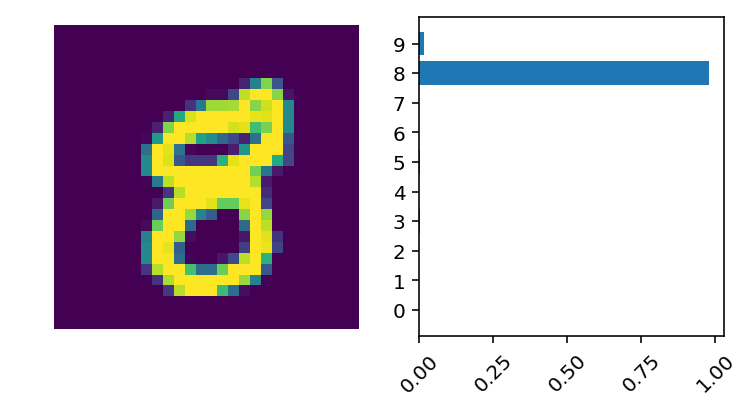

Label:  tensor(8)


In [30]:
fig, (ax1, ax2) = plt.subplots(figsize=(6,6), ncols=2)
ps = ps.data.numpy().squeeze()

ax1.imshow(images[0].resize_(1, 28, 28).numpy().squeeze())
ax1.axis('off')

ax2.barh(np.arange(10), ps )
ax2.set_aspect(0.1)
ax2.set_yticks(np.arange(10))
plt.xticks(rotation='45')

plt.show();
print('Label: ', labels[0])